#### Allowed packages: Pandas, matplotlib, seaborn, and numpy. Sklearn is allowed only for getting the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from helper import *

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

In [2]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

<AxesSubplot: >

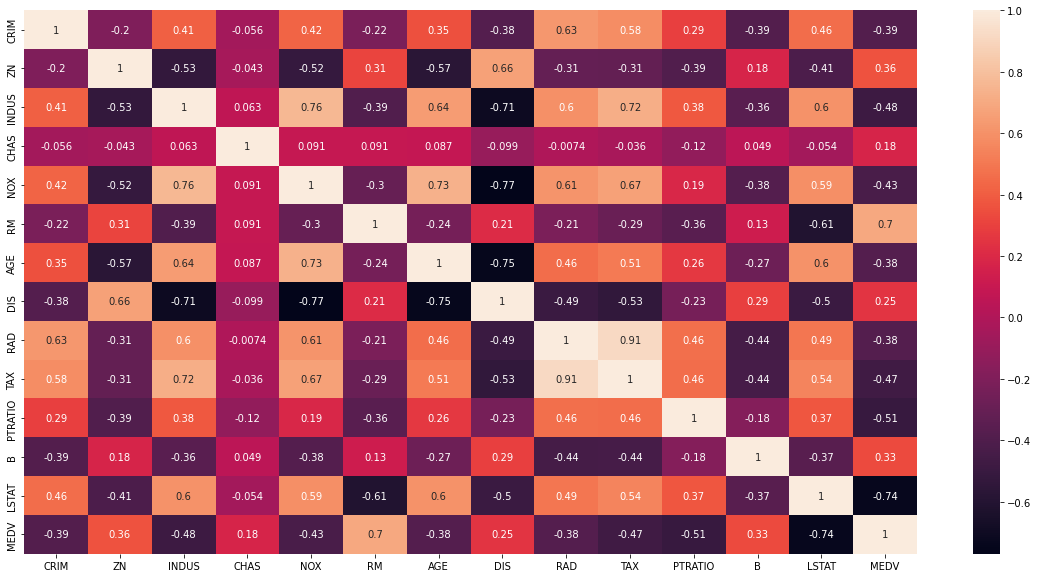

In [3]:
# ans
fig = plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

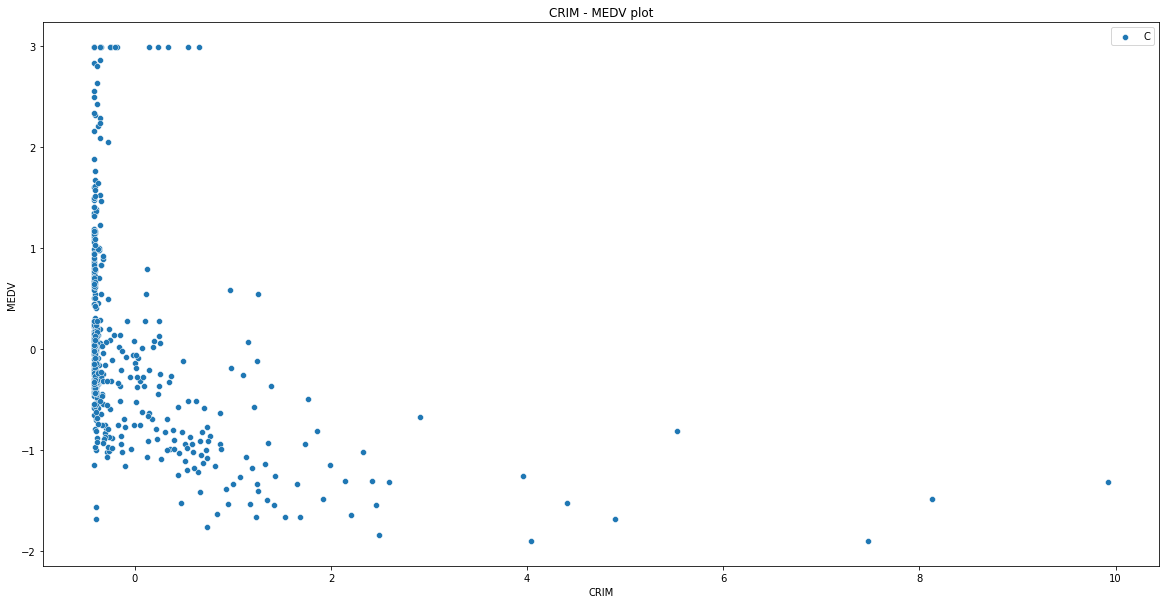

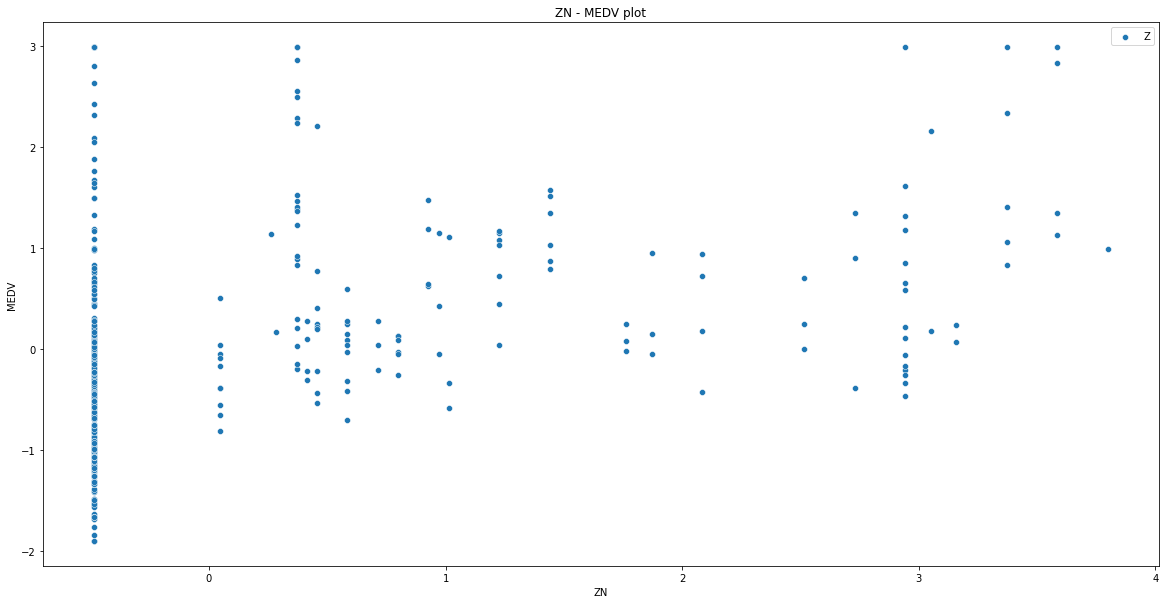

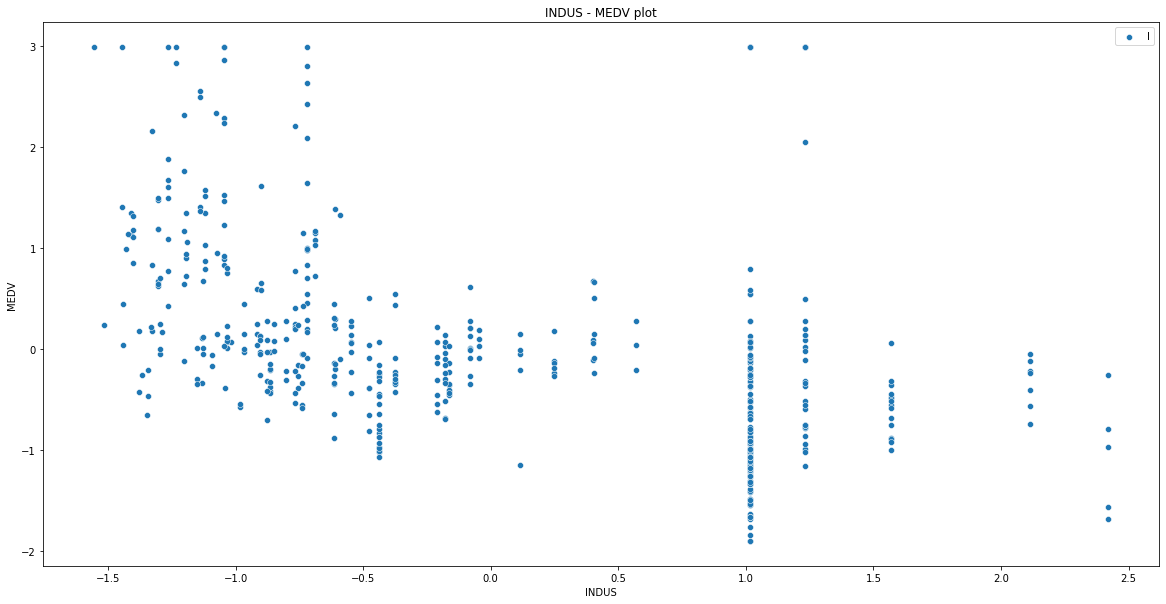

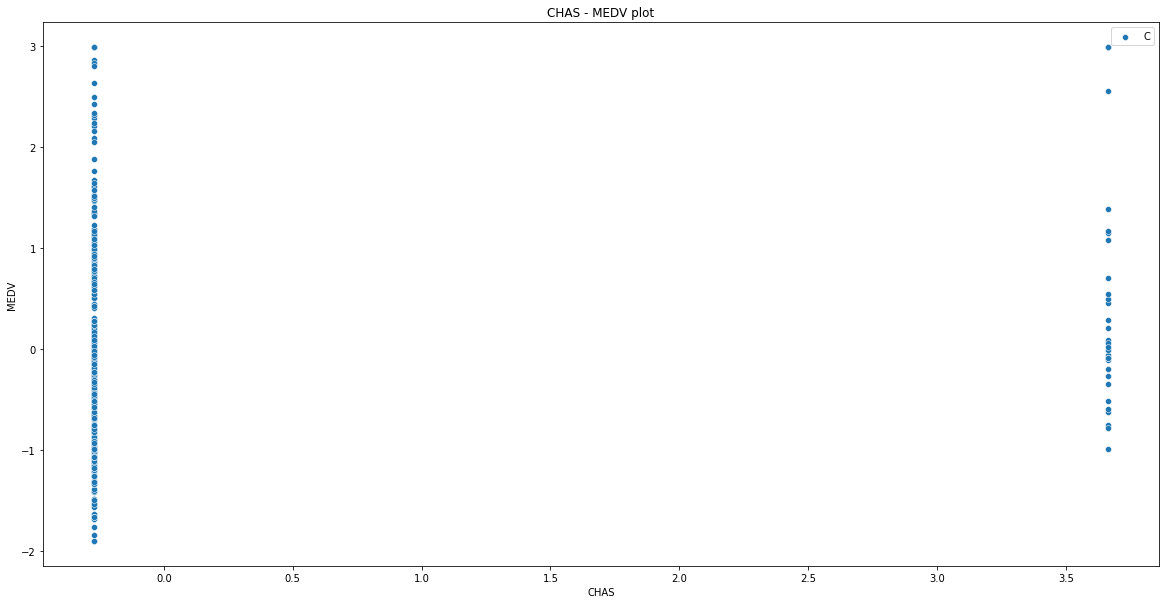

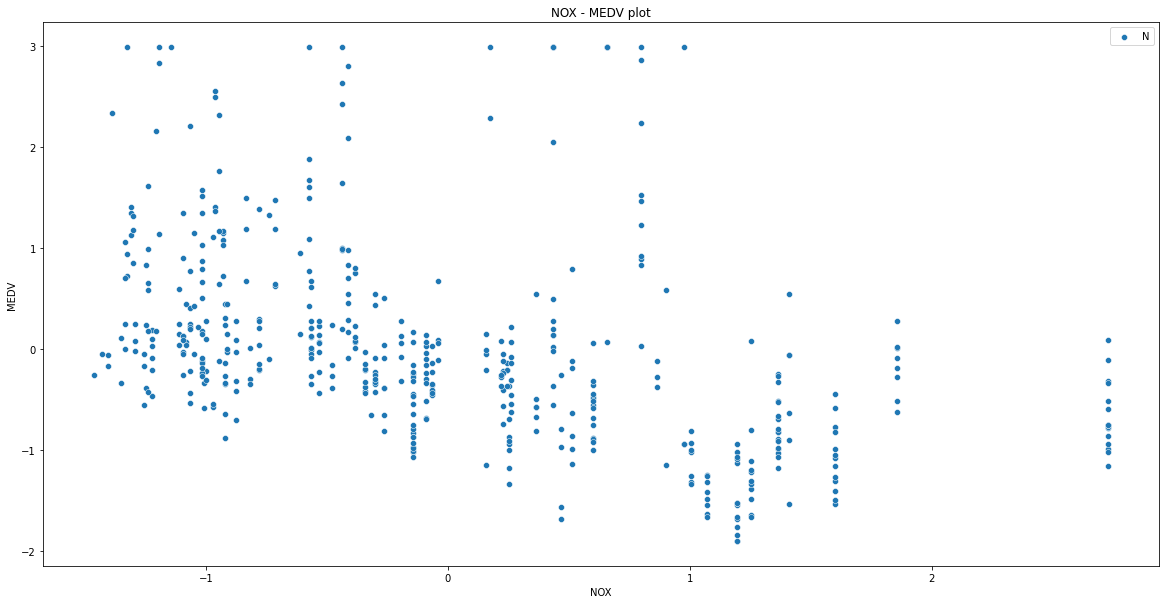

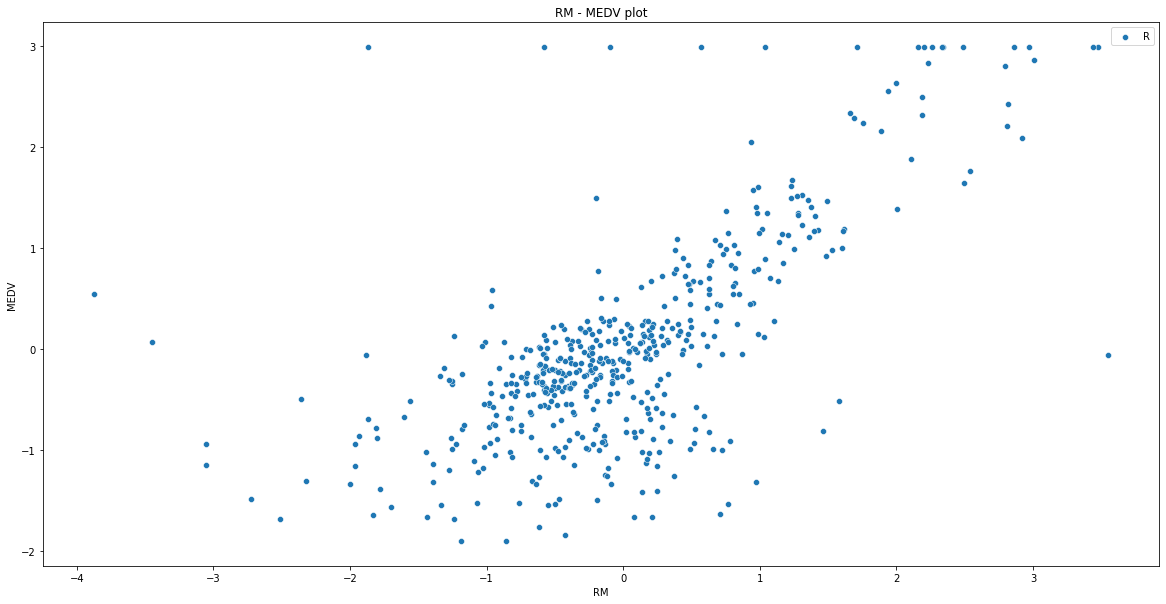

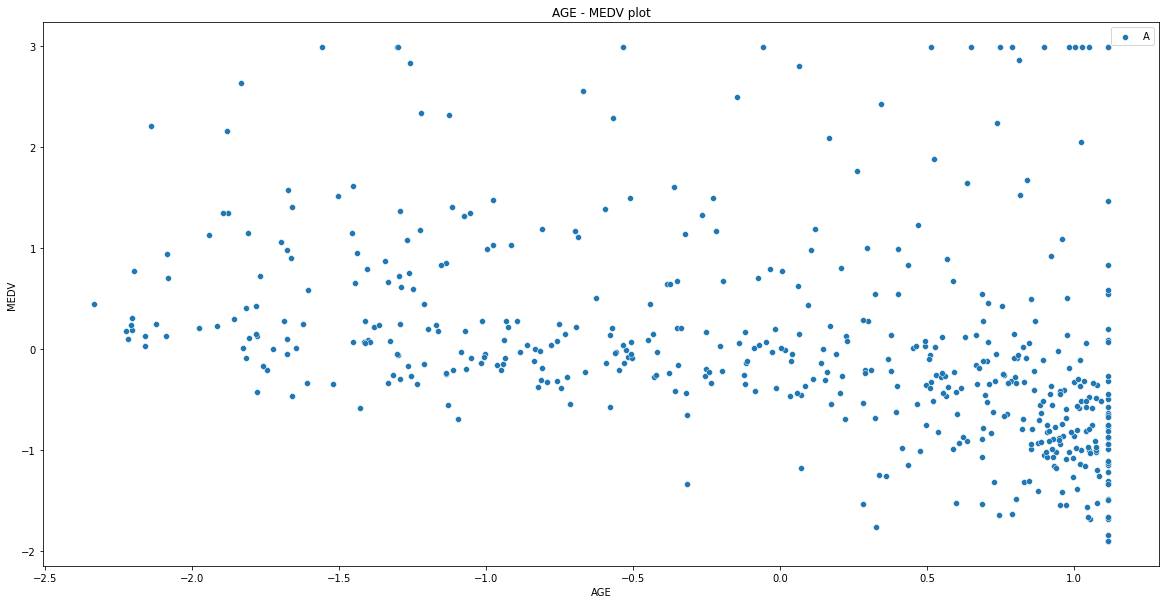

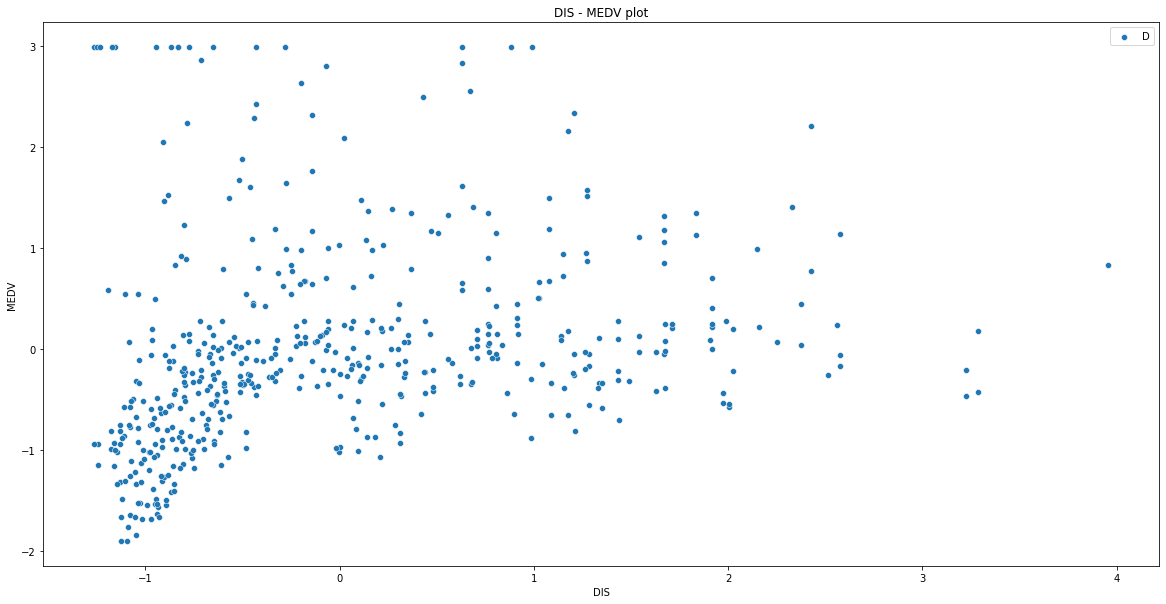

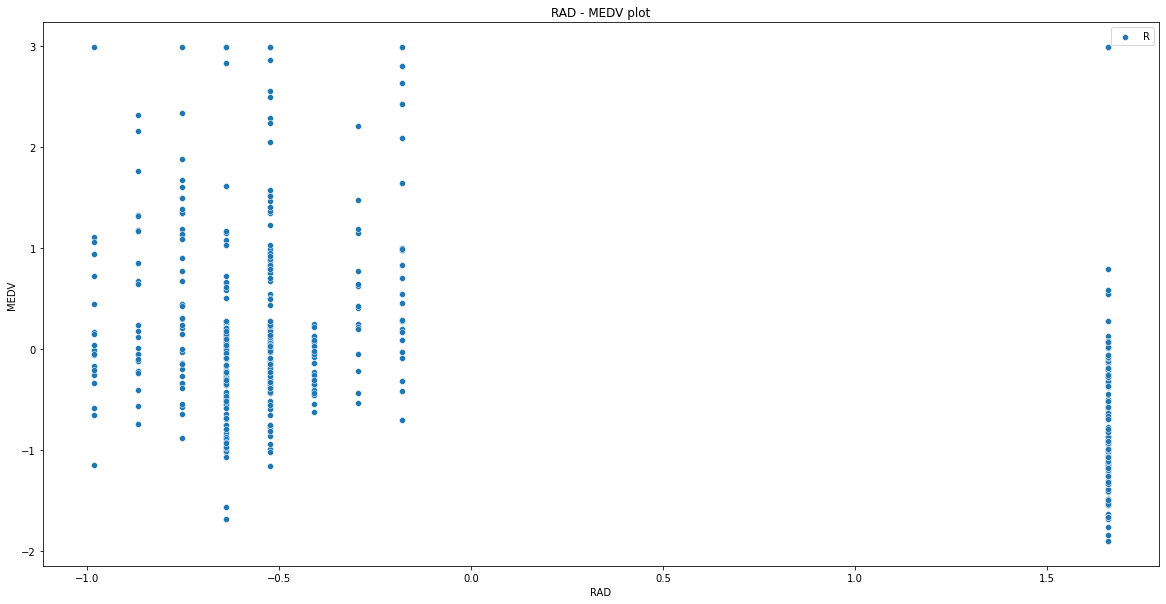

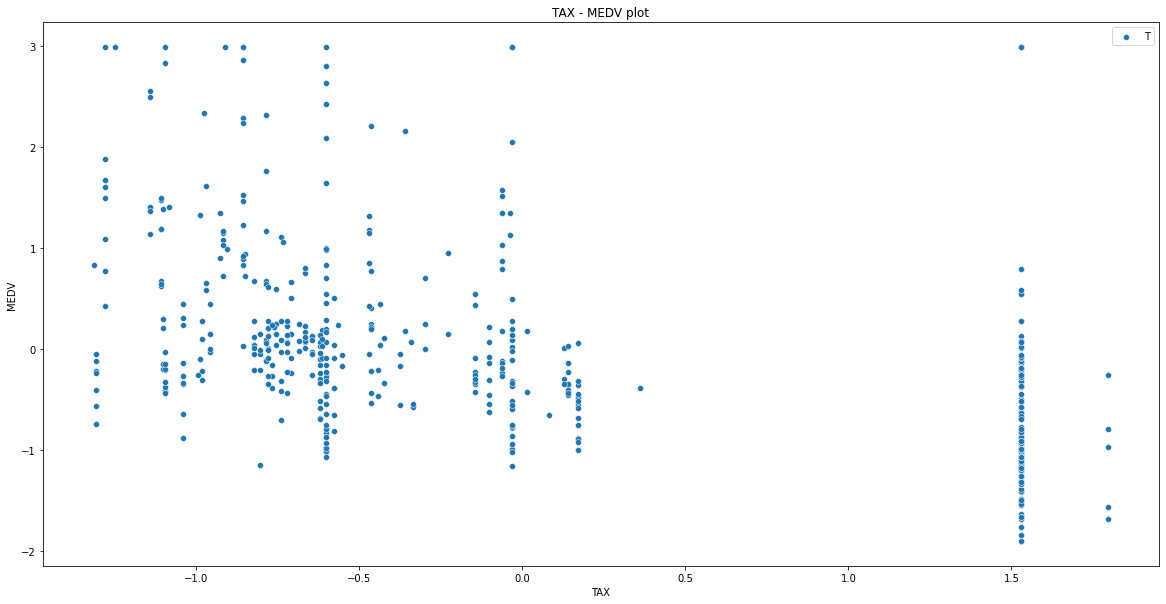

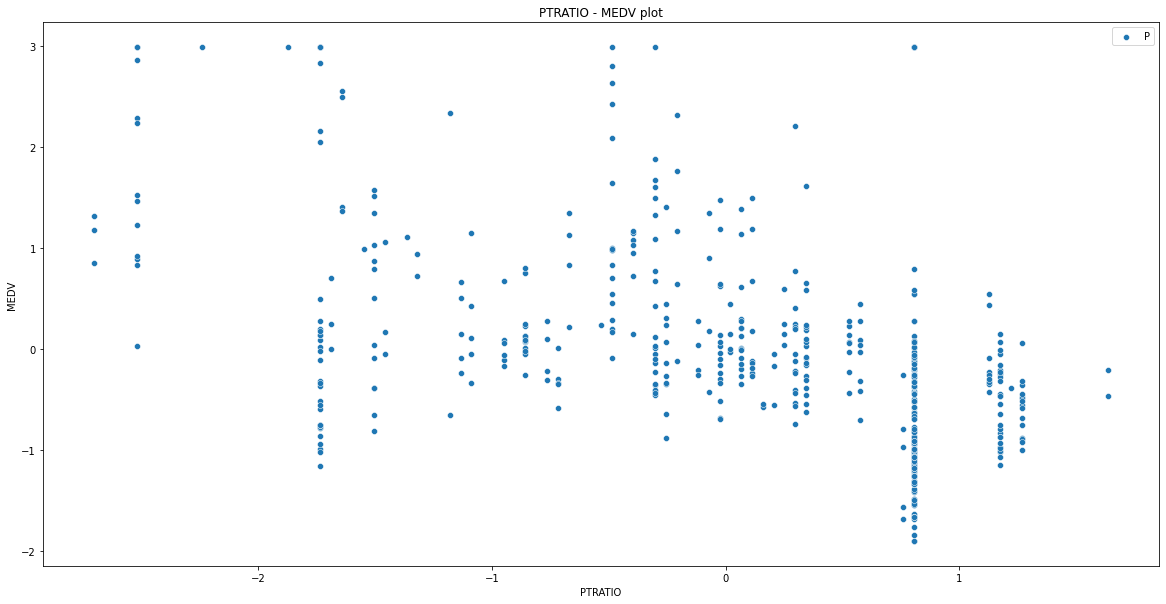

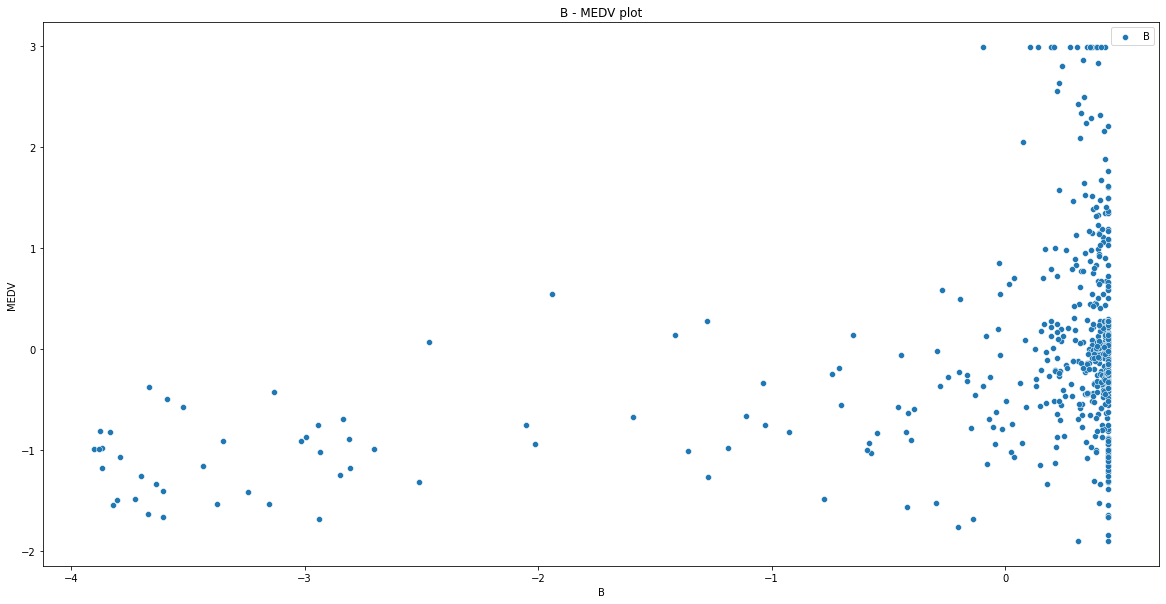

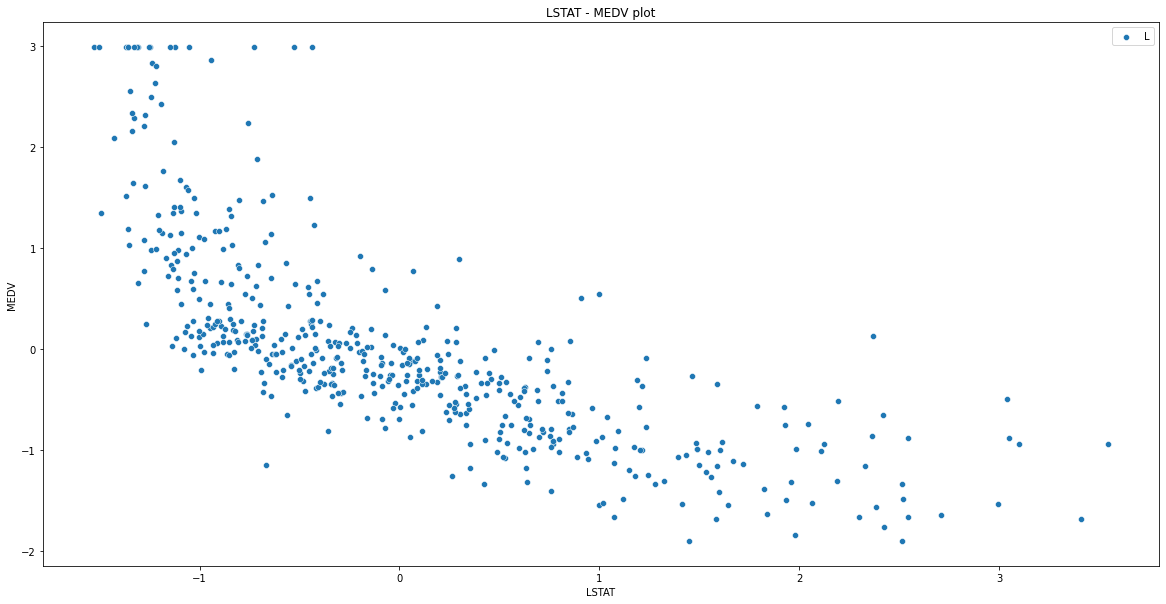

In [4]:
#ans
cols = list(X.columns)
for col in cols:
    show_data(data,col,col+" - "+"MEDV plot",reg = False)

#ans
<div >
    <font size =6>
    explaination
    </font>
    <font size = 5>
        <br><br>
        CRIM-MEDV 
        </font>
    <font size = 4>
        <br> 
        as you see the correlation between two MEDV and CRIM is not noticable (cor = -0.39) but you can say from the plot that as the CRIM increases the possibility that MEDV decreases can be noticed. also correlation of -.39 gives us the same insight.
    </font>
        <font size = 5>
        <br><br>
        ZN-MEDV 
        </font>
    <font size = 4>
        <br> 
        as you see from the plot when ZN increases there is a possibility that MEDV increases it the same insight we get from the correlation value (cor = 0.36). 
    </font>
            <font size = 5>
        <br><br>
        INDUS-MEDV 
        </font>
    <font size = 4>
        <br> 
        the plot diagram of MEDV and INDUS shows that when the INDUS increases the MEDV is more likely to decreases.
        <br>
        this is also as same as insight you can get from cor value(-0.48)
    </font>
 <font size = 5>
        <br><br>
        CHAS-MEDV 
        </font>
    <font size = 4>
        <br>
        the CHAS is categorial feature and as you see you can't say that there is a relation between MEDV and CHAS
        as the cor 0.18 gives us same insight.
    </font>
 <font size = 5>
        <br><br>
        NOX-MEDV 
        </font>
    <font size = 4>
        <br>
        the plot diagroms shows that when NOX increases there is possibility that MEDV decreases. as the same underestanding of correlation (cor = -0.43)
    </font>
 <font size = 5 color = "red">
        <br><br>
        RM-MEDV 
        </font>
    <font size = 4>
        <br>
        the plot shows us very clearly that when the the RM increases the MEDV have high possibility of increasing 
        as you also can see how good the line related to this can be seen in the plot correlation is also 0.7 which is high and show the direct relation( but not Linear).
        <br>
        mark this feature for next step.
    </font>
 <font size = 5>
        <br><br>
        AGE-MEDV 
        </font>
    <font size = 4>
        <br>
as you seee when age increases the more point are about to have lower MEDV as the correlation is -0.38 which gives us same result.
    </font>
 <font size = 5 color = "red">
        <br><br>
        DIS-MEDV 
        </font>
    <font size = 4>
        <br>
        as you see the MEDV is about to increase when DIS increases but with high varriance and the correlation is also 0.25 which gives us same result.
                <br>
        mark this feature for next step.
    </font>
 <font size = 5>
        <br><br>
        RAD-MEDV 
        </font>
    <font size = 4>
        <br>
        despite the fact that correlation is about -0.38 Im going with that there is no relation between these two variables.
    </font>
 <font size = 5>
        <br><br>
        TAX-MEDV 
        </font>
    <font size = 4>
        <br>
        as you see there are more point with higher MEDV at the leftmost points of plot and data with lower MEDV corresponding to rightmost points of plot. the correlation is also -0.47.
    </font>
 <font size = 5>
        <br><br>
        PTRATIO-MEDV 
        </font>
    <font size = 4>
        <br>
        the correlation is -0.51 but besides yes we can the the data at the right have lower MEDV at those rightmost data but to be honest i can't see relation in the plot so let's go with there is not noticable relation.
    </font>
 <font size = 5>
        <br><br>
        B-MEDV 
        </font>
    <font size = 4>
        <br>
        the most data are Concentrated at rightmost points but those with the lower B value happens to have lower MEDV too. that's why the correlation is 0.3 despite the gap between these point shows no relation.
    </font>
 <font size = 5, color = "red">
        <br><br>
        LSTAT-MEDV 
        </font>
    <font size = 4>
        <br>
        as you see the plot obviously the MEDV decreases as LSTAT increases and correlation is also -0.7.
        <br>
        mark this feature.
    </font>
    </div>
    

## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    


#ans
$$
W = (\Phi^T \Phi+\lambda I)^{-1} \Phi^T Y
$$
$$
pred = \Phi W
$$

In [5]:
#ans
class LinearRegressionModel:
    def __init__(self,phi):
        self.w = 0
        self.phi = phi
    def fit(self,X,y,regularization):
        """
        get X and y train and learn the parameter by the equation.
    
        """
        X = X.to_numpy()
        n,m = X.shape
        y = y.to_numpy().reshape(-1,1)
        X = self.phi(X)
        n,m = X.shape
        C = X.T@X + regularization*np.identity(m)
        Cinv = np.linalg.pinv(C)
        w = Cinv@X.T
        w = w@y
        self.w = w.reshape(m,1)
    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        pred = self.transform(X)
        y = y.to_numpy().reshape(-1,1)
        assert len(pred) == len(y) , "length of predicted and target does not match";
        dif = pred - y
        N,_ = y.shape
        error = dif.T@dif
        return float(error/N)
    def transform(self,X):
        """
        get X and calculate Phi(X)W as predicted values.
    
        """
        X = X.to_numpy()
        X = self.phi(X)
        pred = X@self.w
        return pred
    
    def get_param(self):
        return self.w.reshape(-1)
    
def show_data(x,y,pred,title_type,x_axis,save = None):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.scatter(x, y, c="red", label="mainVal")
    ax.scatter(x, pred, c="blue", label="predictedVal")
    ax.legend()
    plt.xlabel(x_axis)
    plt.ylabel('MEDV') 
    plt.title(x_axis+"-MEDV plot for "+title_type)
    if save!= None:
        plt.savefig(save)
    plt.show()
def show_analysis(X_train,y_train,X_test,y_test,model,regularization,features,show_plot=True,show_info=True,train=True,test=True):
    if show_info:
        print("model info : regularization = ",regularization);
        print("training set error = ",model.evaluate(X_train,y_train));
        print("test set error = ",model.evaluate(X_test,y_test));
        print("the W is :");
        print(model.get_param().reshape(1,-1));
        print("w size(norm2) is :",np.linalg.norm(model.get_param()))
    if show_plot:
        pred_test = model.transform(X_test);
        pred_train = model.transform(X_train);
        for feature in features:
            if train:
                show_data(X_train[feature].to_numpy(),y_train,pred_train,"trainingSet",feature)
            if test:
                show_data(X_test[feature].to_numpy(),y_test,pred_test,"testSet",feature)
def evaluate_reg_feature(phi,R):
    losseval = []
    losstr= []
    norm = []
    for i in R:
        model = LinearRegressionModel(phi)
        model.fit(X_train,y_train,i)
        losseval.append(model.evaluate(X_test,y_test))
        losstr.append(model.evaluate(X_train,y_train))
        norm.append(np.linalg.norm(model.get_param()))
    fig = plt.figure(figsize=(20,10))
    plt.plot(R,losseval)
    plt.title("test error - R")
    plt.show()
    fig = plt.figure(figsize=(20,10))
    plt.plot(R,losstr)
    plt.title("training error - R")
    plt.show()
    fig = plt.figure(figsize=(20,10))
    plt.plot(R,norm)
    plt.title("norm - R")
    plt.show()

model info : regularization =  0
training set error =  0.27574255831373573
test set error =  0.21389490143545944
the W is :
[[ 0.00328704 -0.10659234  0.10339115  0.0296403   0.08799677 -0.25311506
   0.29677219  0.00947765 -0.32637157  0.27961317 -0.17772914 -0.24419301
   0.11118696 -0.3916872 ]]
w size(norm2) is : 0.7903267921189133


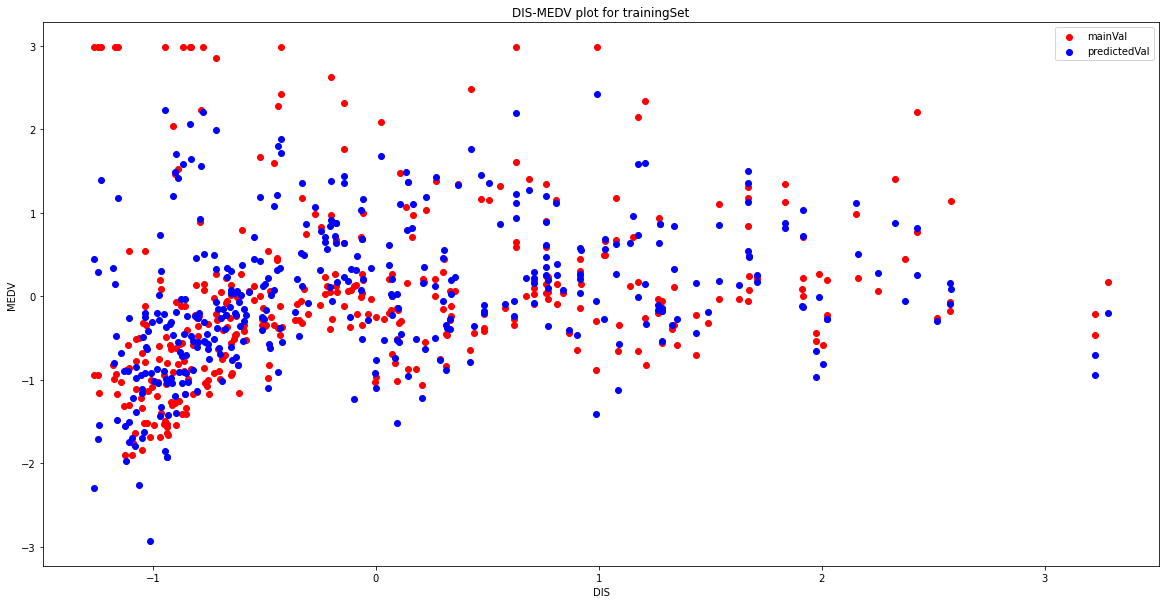

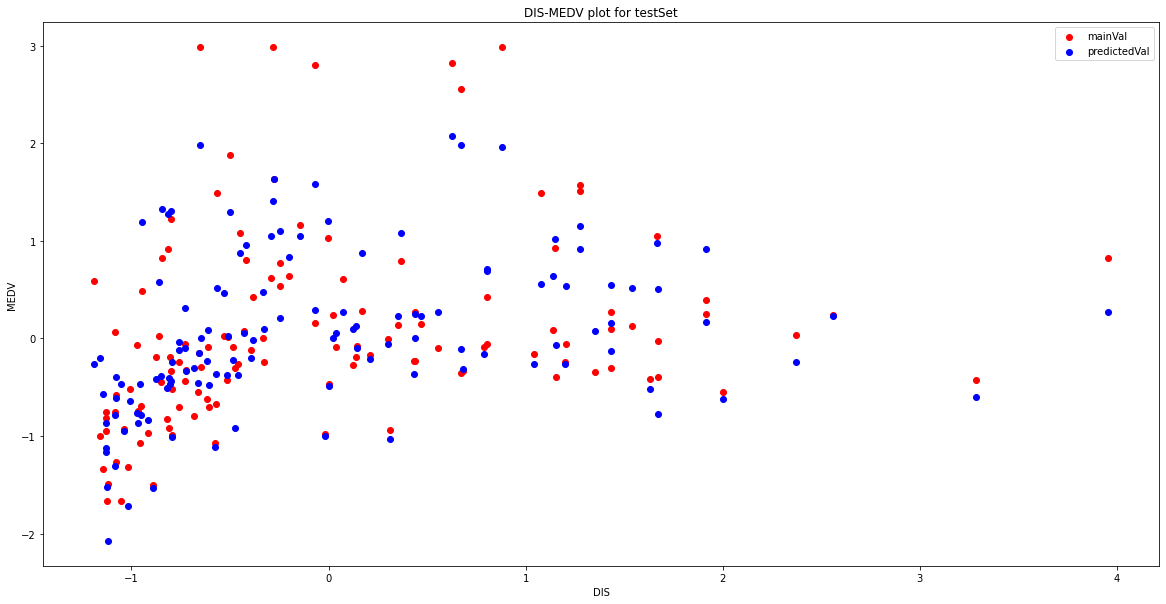

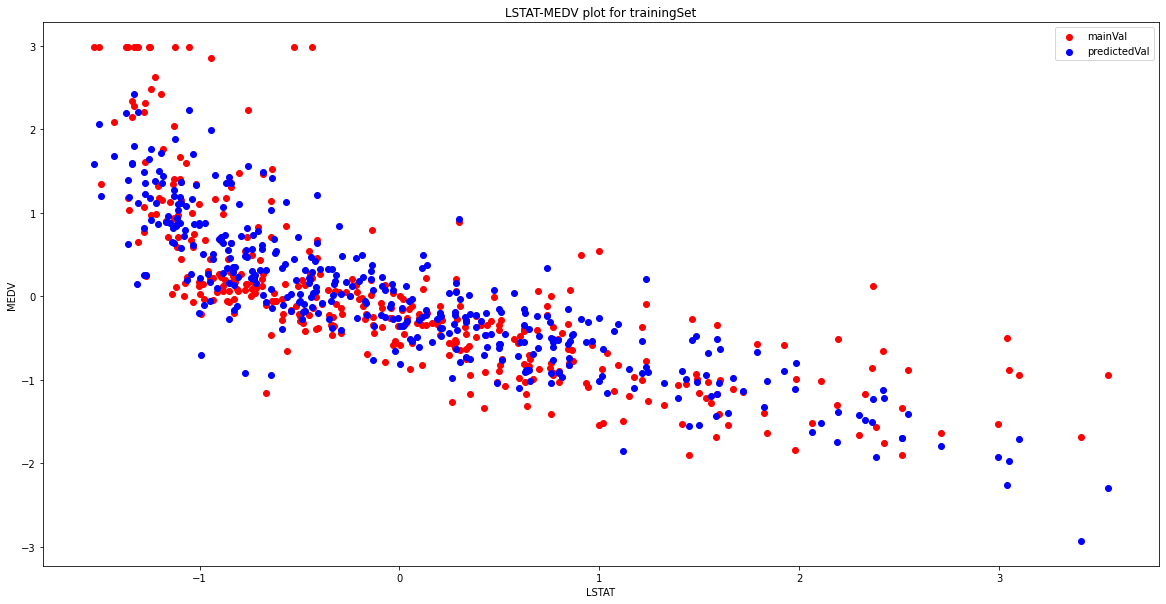

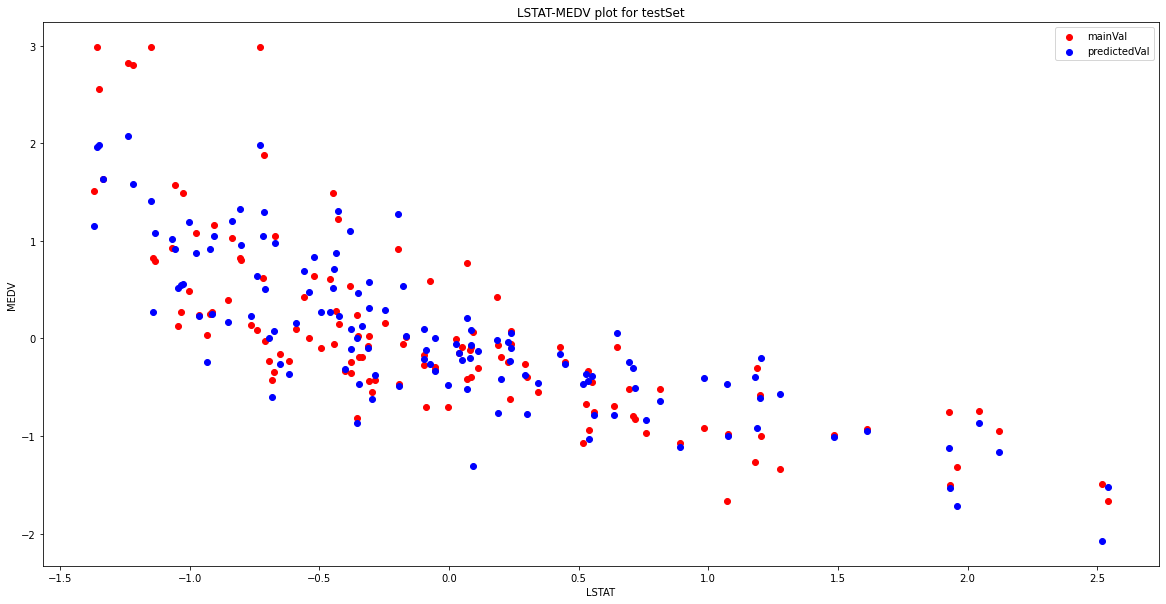

In [6]:
#ans
phi_1 = lambda X : np.c_[np.ones(X.shape[0]),X];
regularization = 0;
model = LinearRegressionModel(phi_1);
model.fit(X_train,y_train,regularization);
features = ["DIS","LSTAT"]
show_analysis(X_train, y_train, X_test, y_test,model,regularization,features)

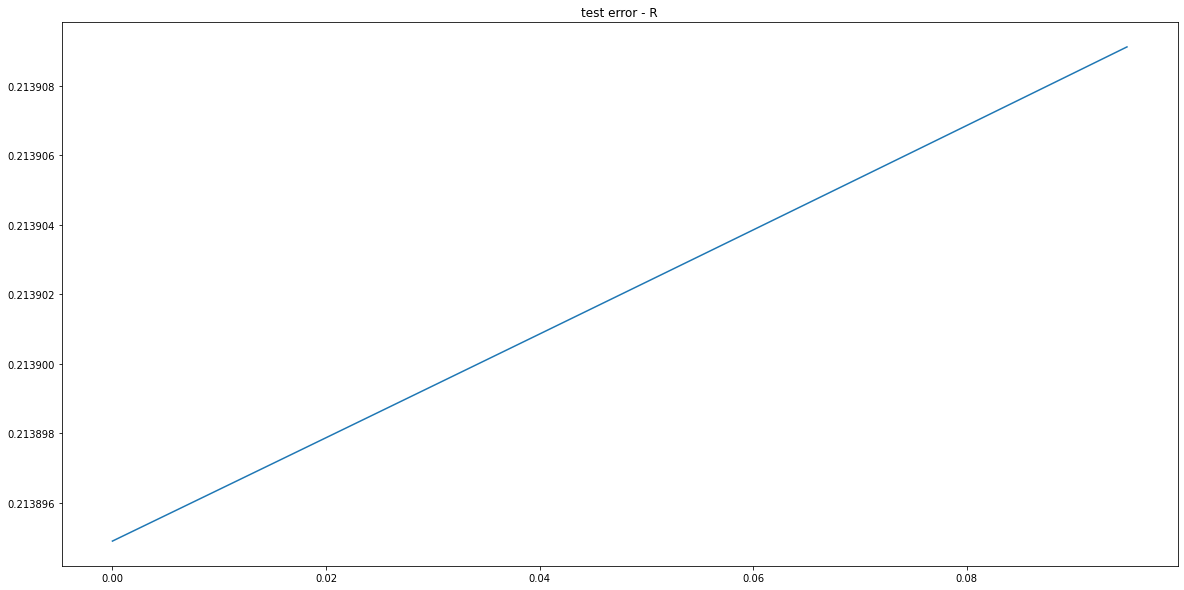

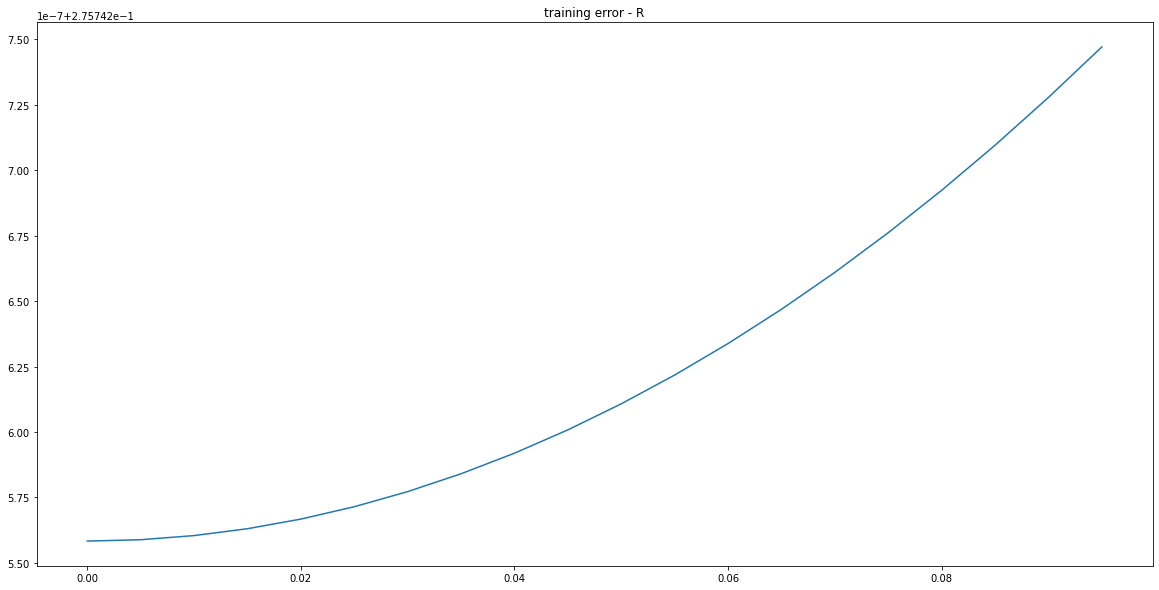

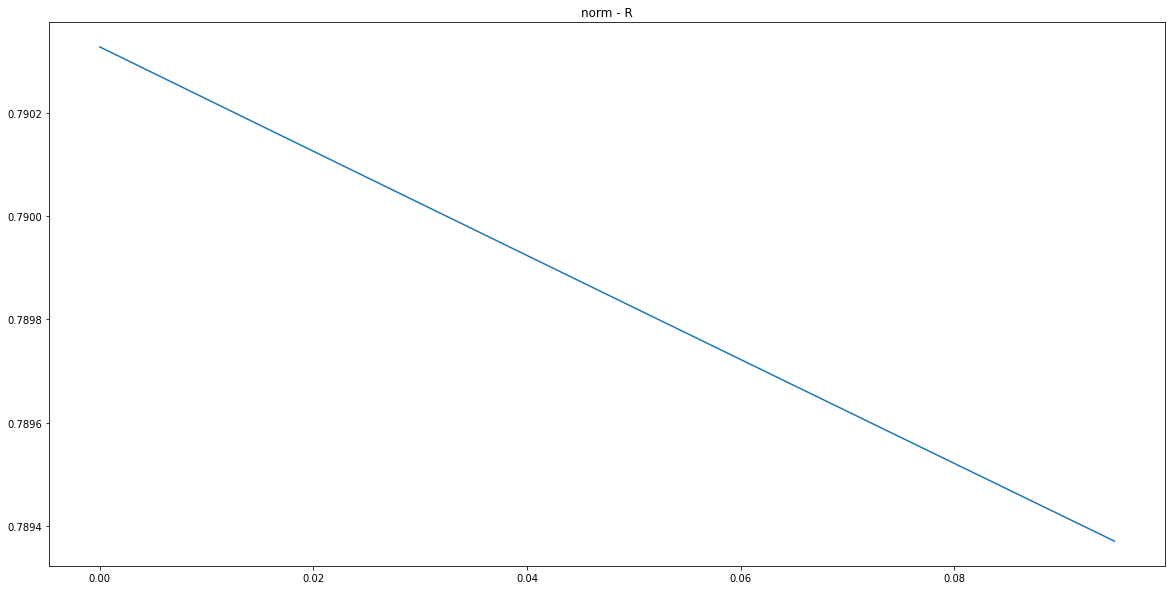

In [7]:
##ans
evaluate_reg_feature(lambda X : np.c_[np.ones(X.shape[0]),X],np.arange(0,0.1,0.005))

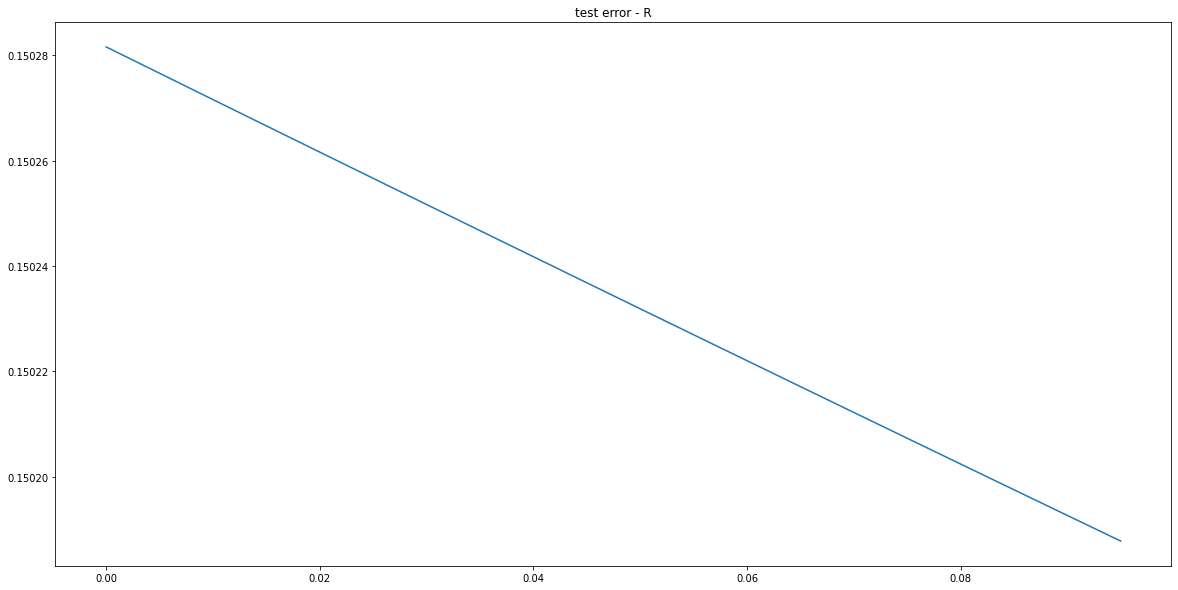

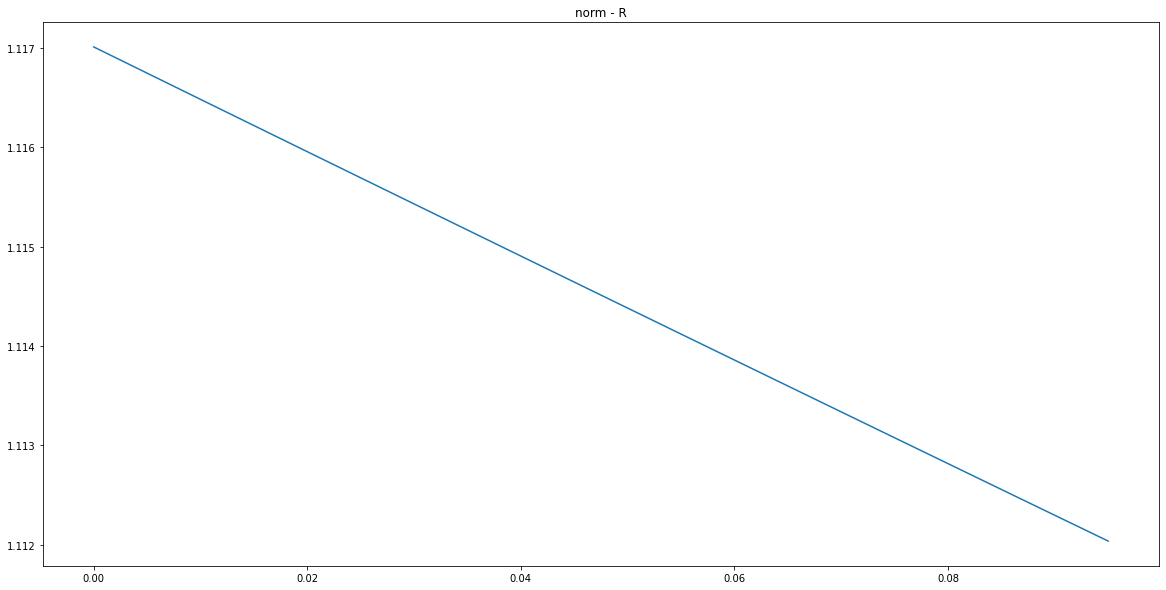

In [8]:
#ans
evaluate_reg_feature(lambda X : np.c_[np.ones(X.shape[0]),X**2,X],np.arange(0,0.1,0.005))

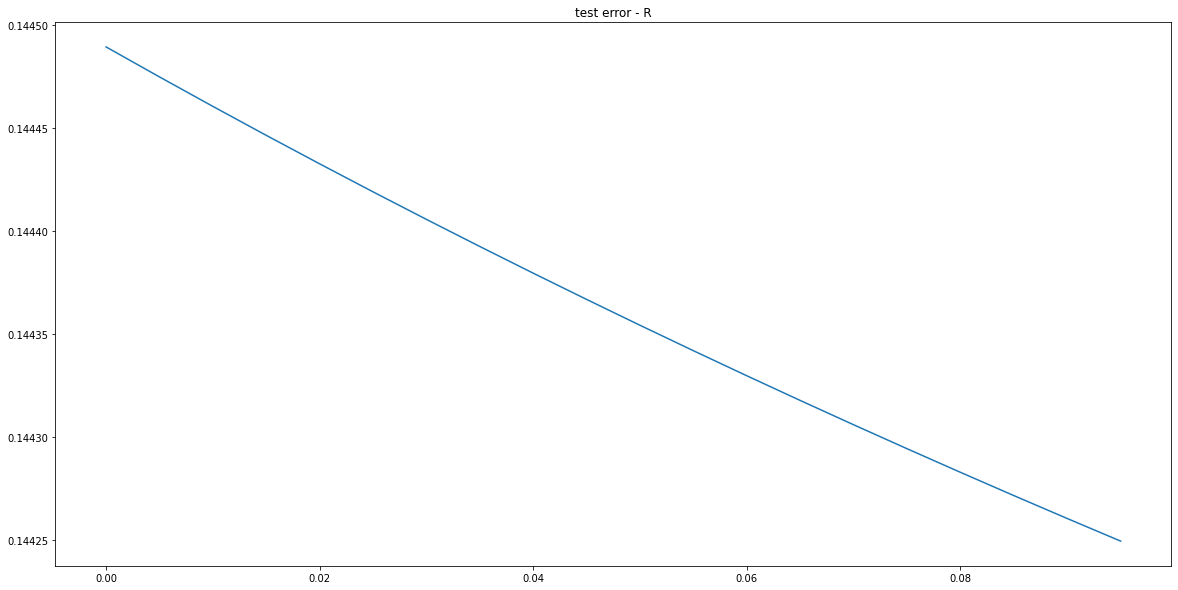

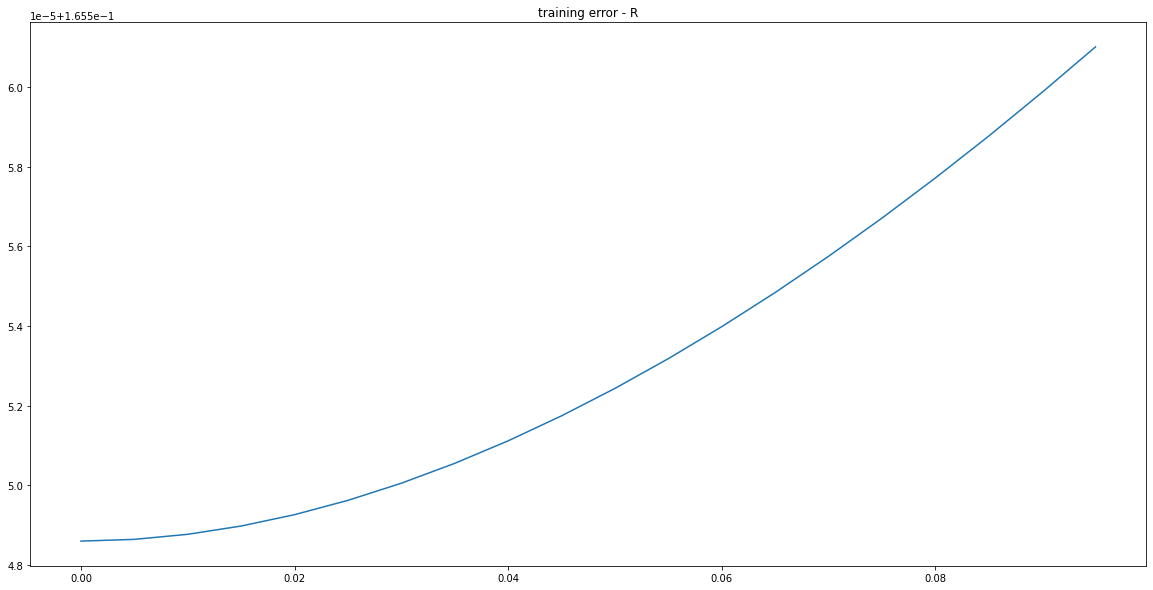

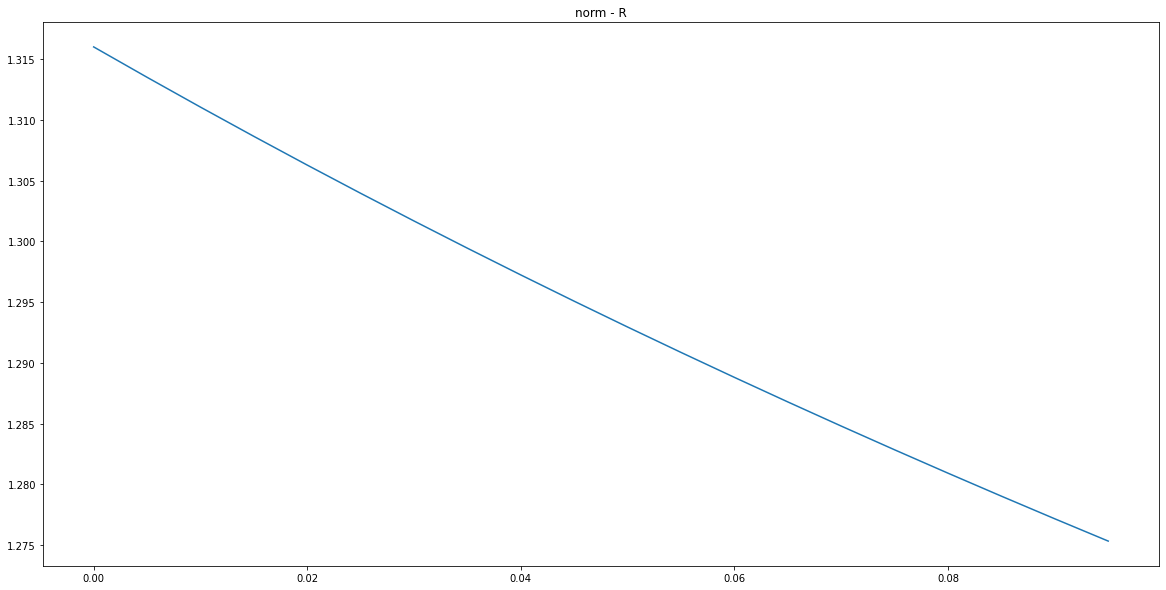

In [9]:
#ans
evaluate_reg_feature(lambda X : np.c_[np.ones(X.shape[0]),X**2,X**3,X],np.arange(0,0.1,0.005))

# gradient descent with best learning rate

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

In [10]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

In [11]:
class LinearRegressionModel:
    def __init__(self,phi):
        self.w = 0
        self.phi = phi
    def fit(self,X,y,regularization,steps=10):
        """
        get X and y train and learn the parameter by the equation.
    
        """
        X = X.to_numpy()
        y = y.to_numpy().reshape(-1,1)
        X = self.phi(X)
        n,m = X.shape
        w = np.zeros((m, 1)) 
        for i in range(steps):
            h = (X.T@X + regularization*np.identity(m))
            w = w - np.linalg.pinv(h) @ (h@w- X.T@y)
        self.w = w
    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        pred = self.transform(X)
        y = y.to_numpy().reshape(-1,1)
        assert len(pred) == len(y) , "length of predicted and target does not match";
        dif = pred - y
        N,_ = y.shape
        error = dif.T@dif
        return float(error/N)
    def transform(self,X):
        """
        get X and calculate Phi(X)W as predicted values.
    
        """
        X = X.to_numpy()
        X = self.phi(X)

        pred = X@self.w
        return pred
    
    def get_param(self):
        return self.w.reshape(-1)

model info : regularization =  0
training set error =  0.2757425583137356
test set error =  0.21389490143545936
the W is :
[[ 0.00328704 -0.10659234  0.10339115  0.0296403   0.08799677 -0.25311506
   0.29677219  0.00947765 -0.32637157  0.27961317 -0.17772914 -0.24419301
   0.11118696 -0.3916872 ]]
w size(norm2) is : 0.7903267921189145


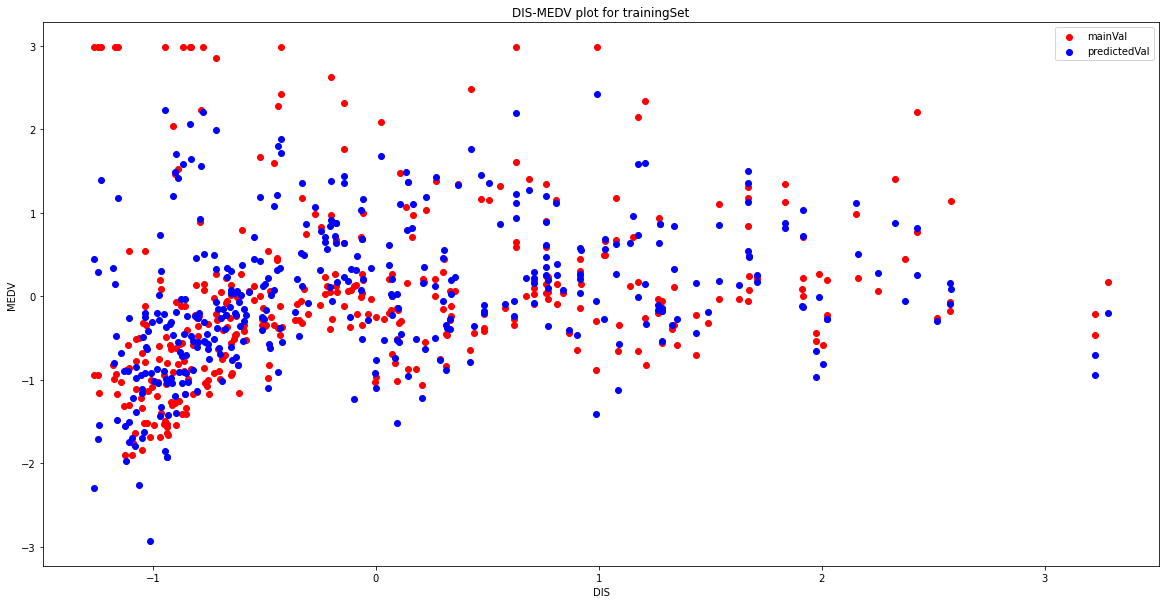

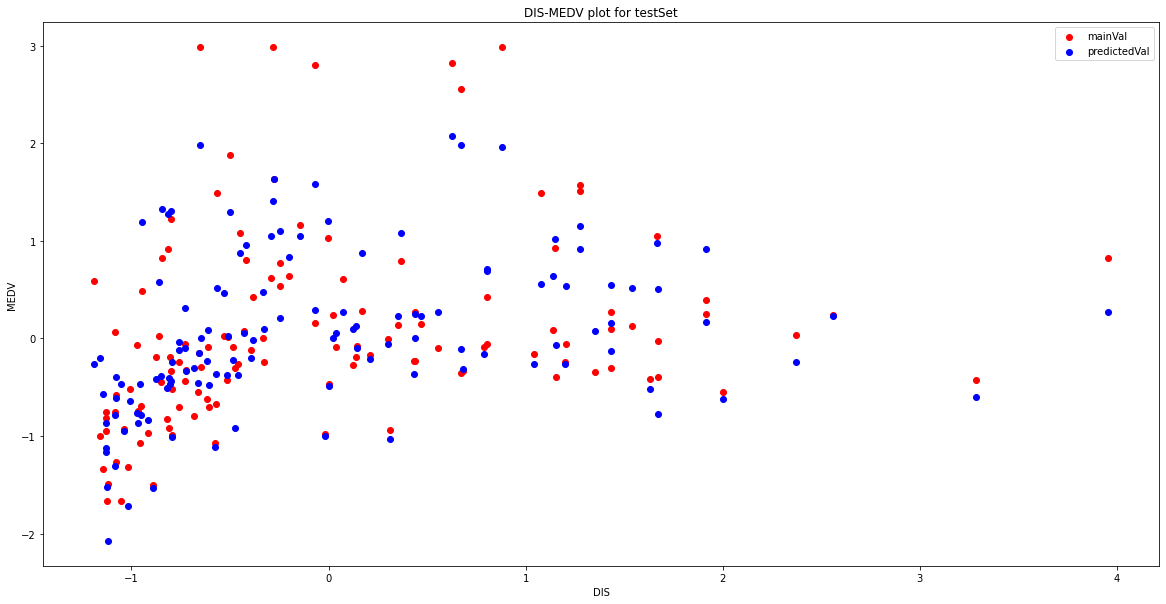

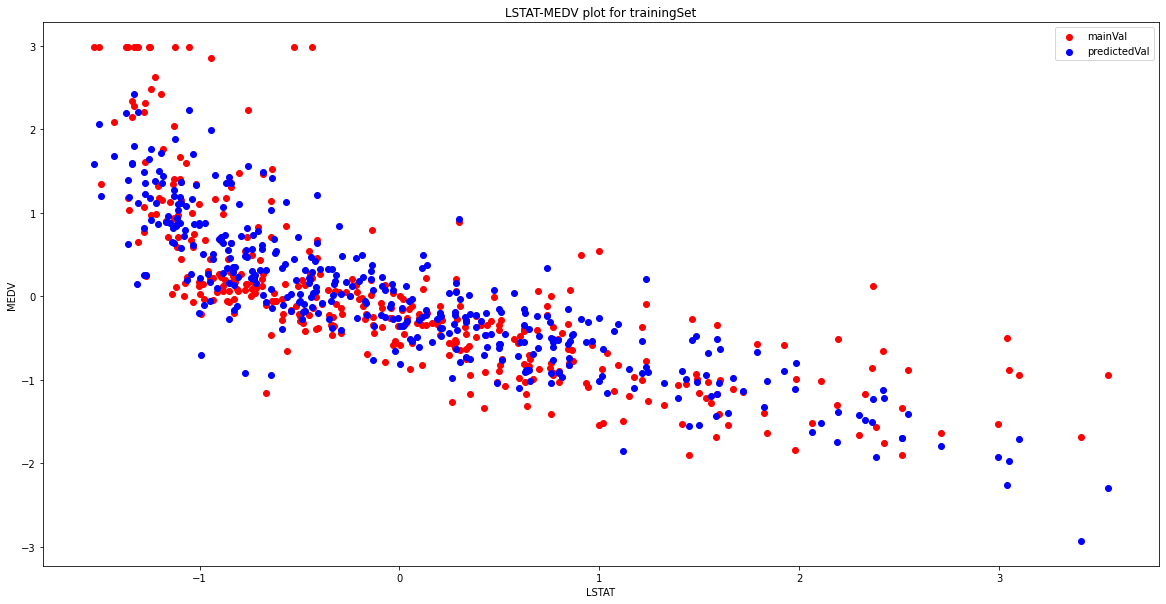

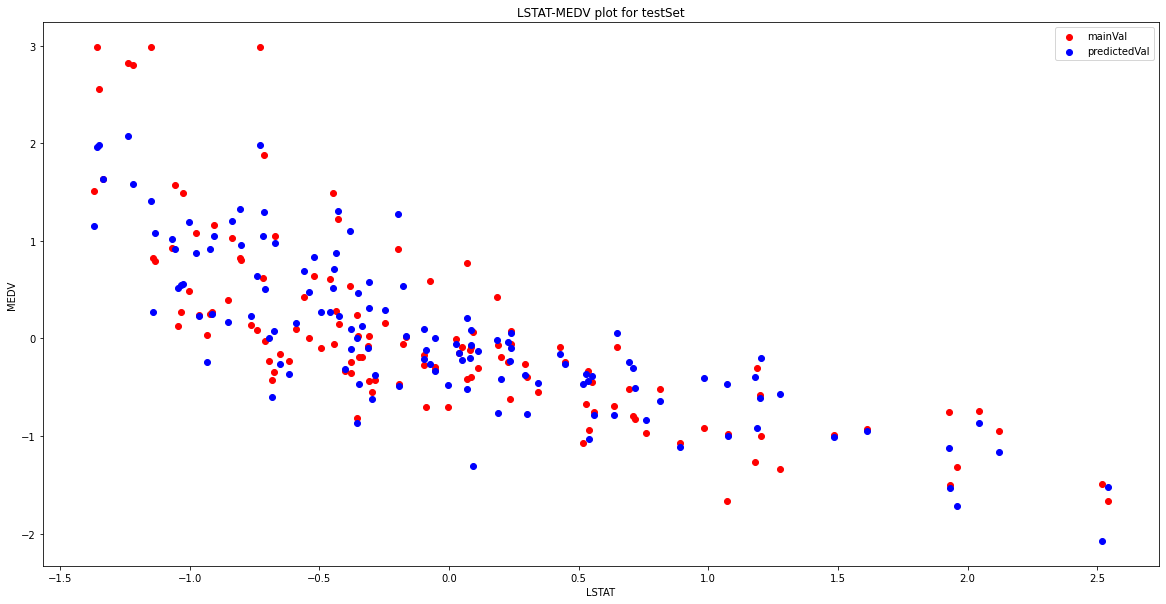

In [12]:
phi_1 = lambda X : np.c_[np.ones(X.shape[0]),X];
regularization = 0;
model = LinearRegressionModel(phi_1);
model.fit(X_train,y_train,regularization,steps = 100)
features = ["DIS","LSTAT"]
show_analysis(X_train, y_train, X_test, y_test,model,regularization,features)

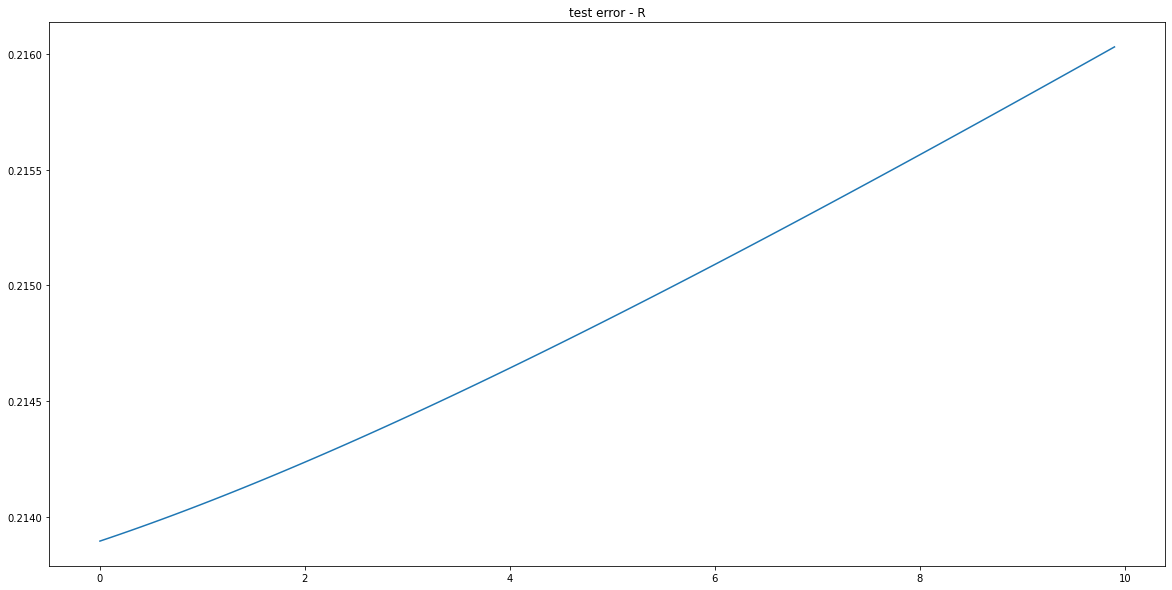

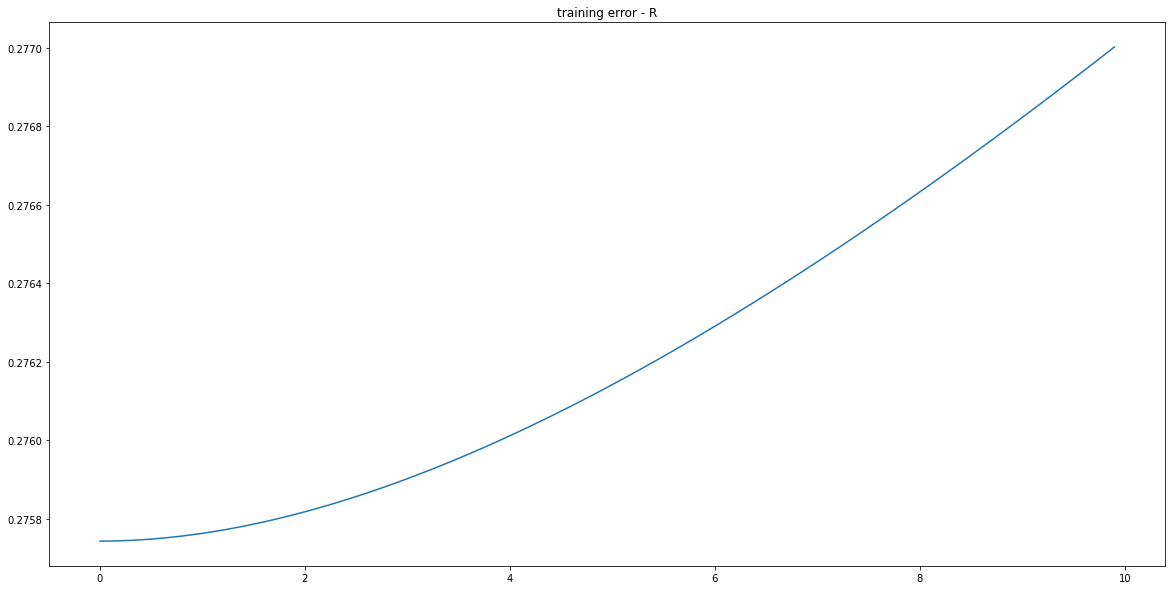

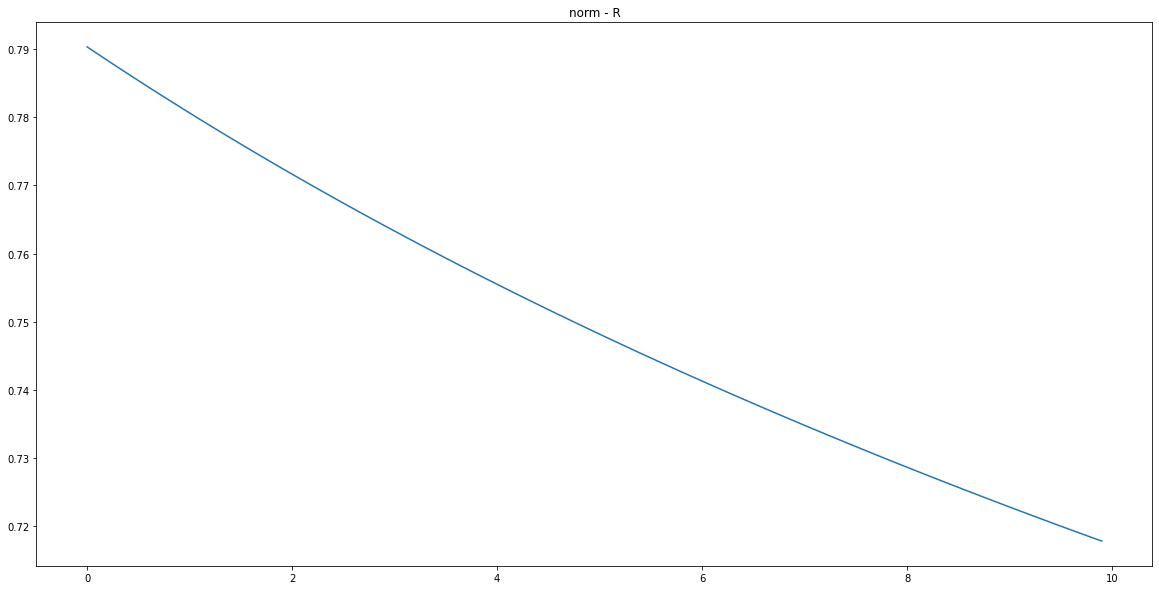

In [13]:
##ans
evaluate_reg_feature(lambda X : np.c_[np.ones(X.shape[0]),X],np.arange(0,10,0.1))

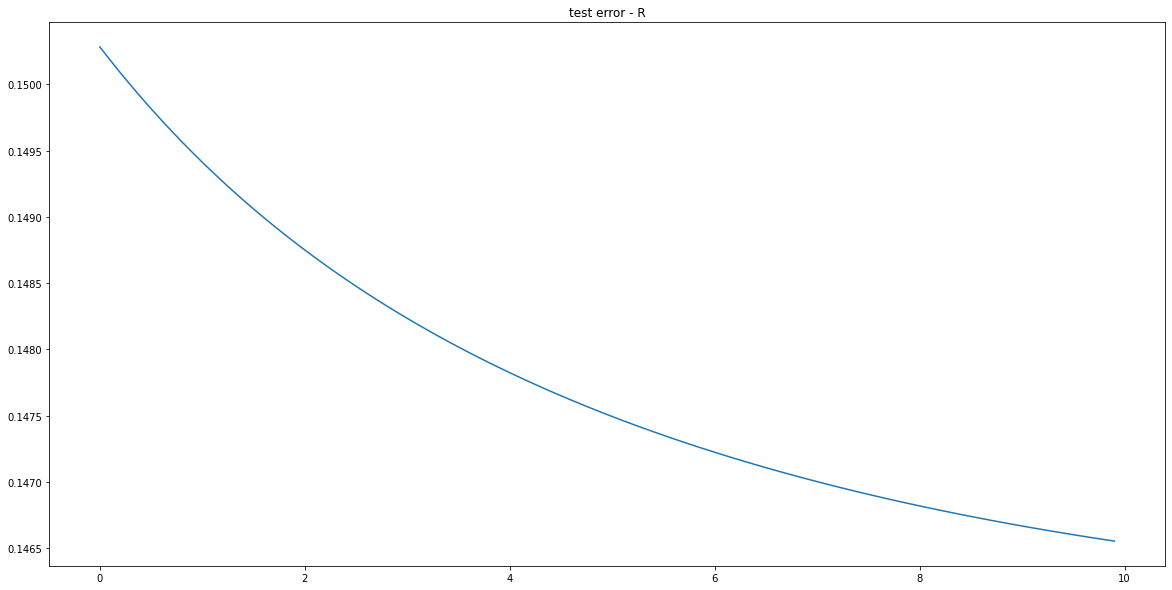

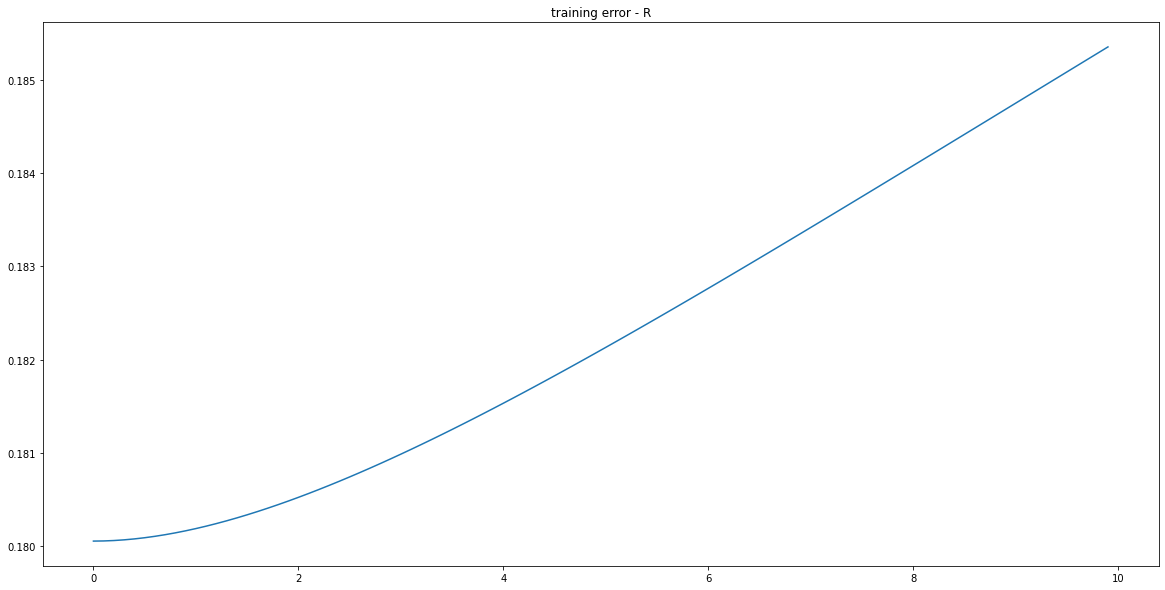

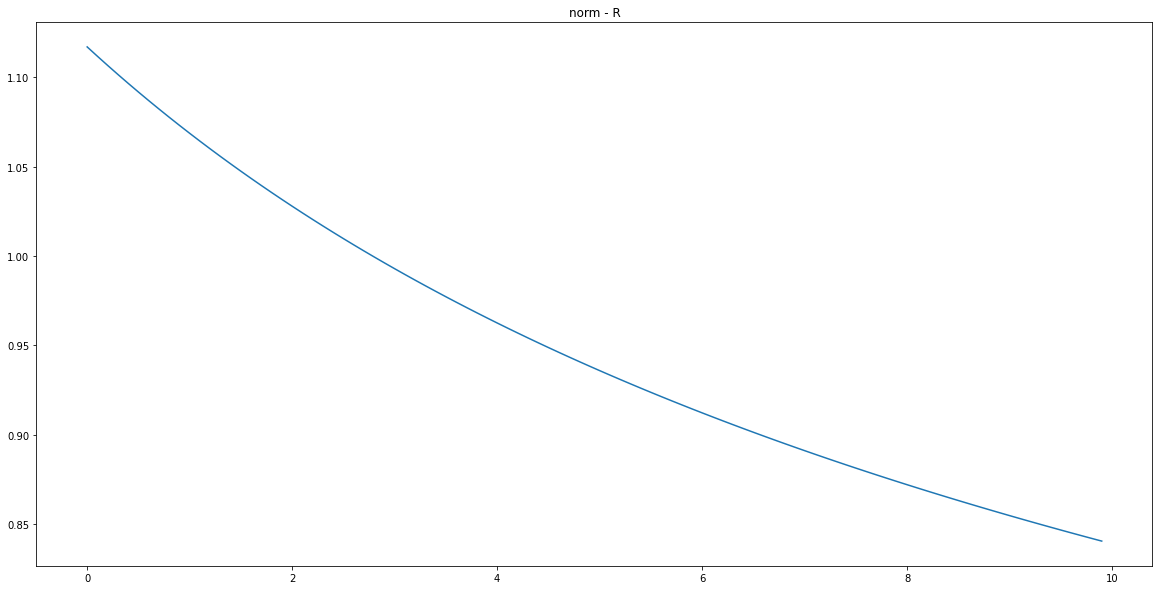

In [14]:
##ans
evaluate_reg_feature(lambda X : np.c_[np.ones(X.shape[0]),X**2,X],np.arange(0,10,0.1))

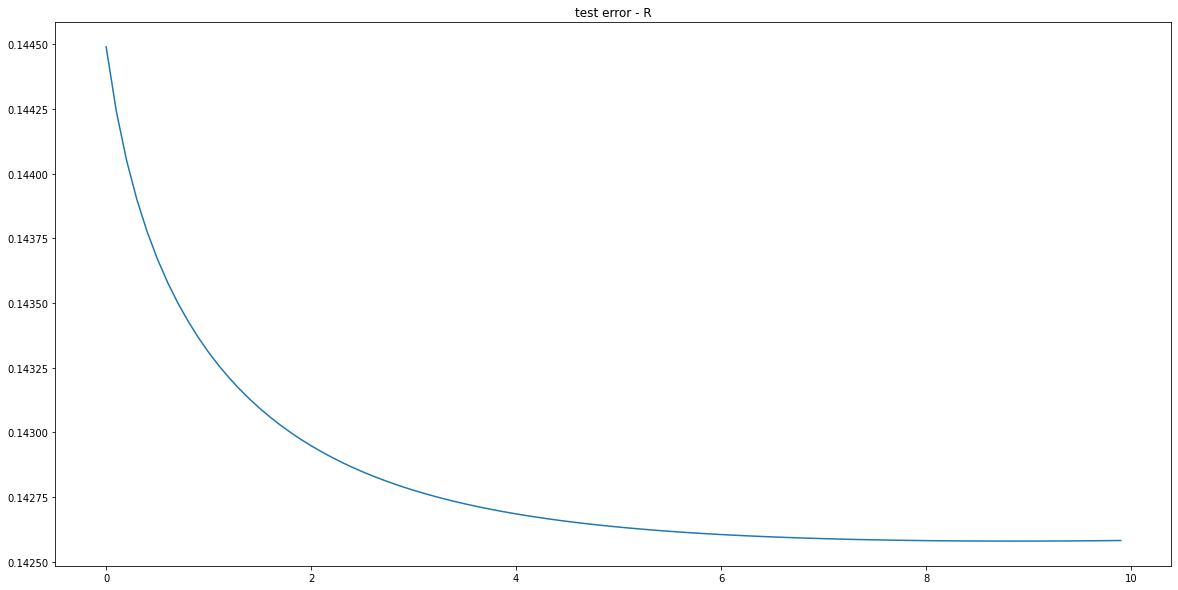

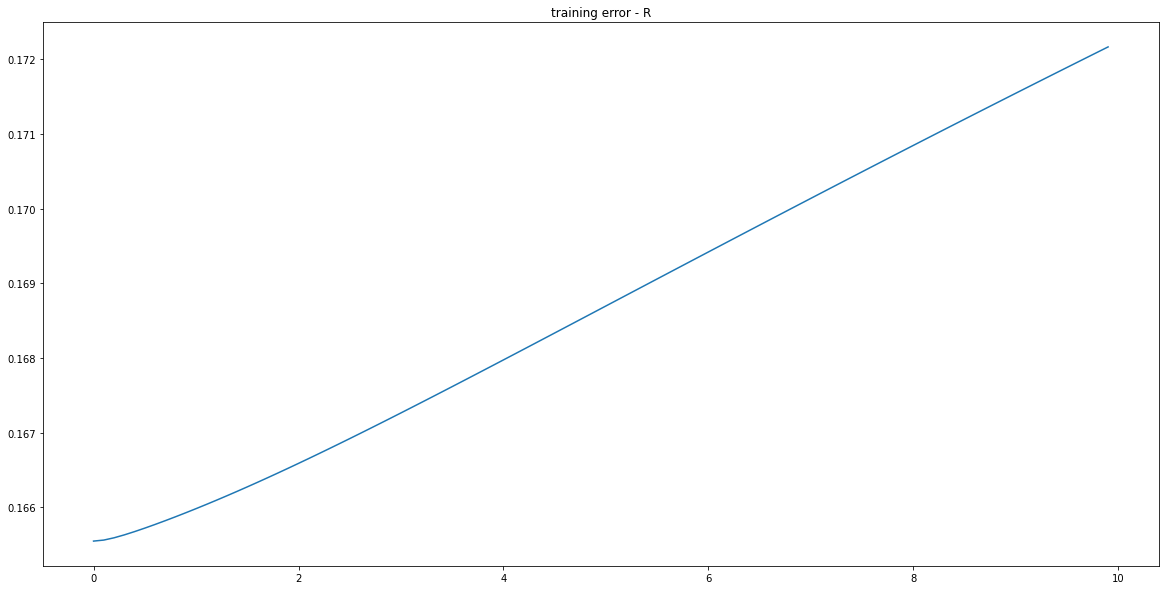

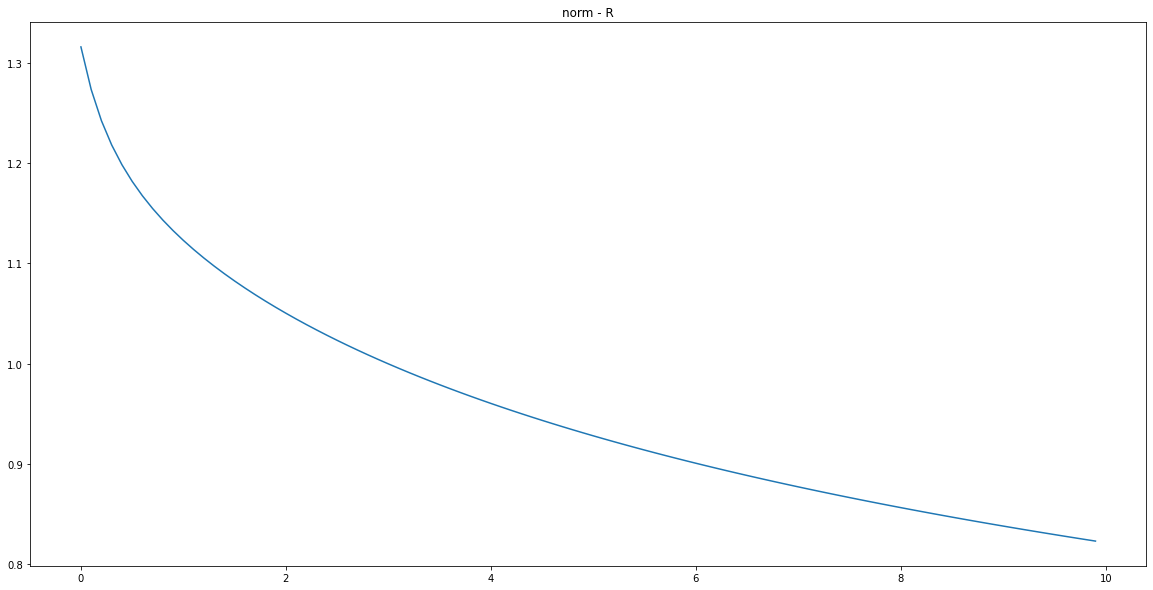

In [15]:
##ans
evaluate_reg_feature(lambda X : np.c_[np.ones(X.shape[0]),X**2,X**3,X],np.arange(0,10,0.1))